In [2]:
from pandas import read_csv
import numpy as np

In [3]:
df=read_csv('international-airline-passengers1.csv',usecols=[1])

In [4]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
values=df.values.astype('float32')
values.shape

(144, 1)

In [6]:
train_size=int(values.shape[0]*0.67)
test_size=values.shape[0]-train_size
train=values[0:train_size]
test=values[train_size:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [8]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [9]:
e=2000
look_back=15
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [10]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(81, 15, 1)

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Using TensorFlow backend.


In [12]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=e,batch_size=1)








Epoch 1/2000





81/81 [==============================] - 1s 9ms/step - loss: 0.0320
Epoch 2/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 3/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 4/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 5/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 6/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 7/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 8/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 9/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 10/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 11/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 12/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 13/2000

81/81 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 72/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 73/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 74/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 75/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 76/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 77/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 78/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 79/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 80/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 81/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 82/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 83/2000
81/81 [=========

81/81 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 170/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 171/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 172/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 173/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 174/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 175/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 176/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 177/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 178/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 179/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 180/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 181/2000
81/8

81/81 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 268/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 269/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 270/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 271/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 272/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 273/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 274/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 275/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 276/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 277/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 278/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 279/2000
81/8

81/81 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 366/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 367/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 368/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 369/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 370/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 371/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 372/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 373/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 374/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 375/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 376/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 377/2000
81/8

81/81 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 464/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 465/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 466/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 467/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 468/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 469/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 470/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 471/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 472/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 473/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 474/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 475/2000
81/8

81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 562/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 563/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 564/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 565/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 566/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 567/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 568/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 569/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 570/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 571/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 572/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 573/2000
81/8

81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 660/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 661/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 662/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 663/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 664/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 665/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 666/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 667/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 668/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 669/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 670/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 671/2000
81/8

81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 758/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 759/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 760/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 761/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 762/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 763/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 764/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 765/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 766/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 767/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 768/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 769/2000
81/8

81/81 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 856/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 857/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 858/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 859/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 860/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 861/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 862/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 863/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 864/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 865/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 866/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 867/2000
81/8

81/81 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 954/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 955/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 956/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 957/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 958/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 959/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 960/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 961/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 962/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 963/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 964/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 965/2000
81/8

81/81 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1051/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1052/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 1053/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1054/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1055/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1056/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1057/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1058/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1059/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1060/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1061/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 10

81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1148/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1149/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1150/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1151/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1152/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1153/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1154/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1155/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1156/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1157/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 1158/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 11

81/81 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1245/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1246/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1247/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1248/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1249/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1250/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1251/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1252/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1253/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1254/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1255/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 12

81/81 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1342/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1343/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1344/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1345/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1346/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1347/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0014- ETA: 0s - loss: 0.0014 
Epoch 1348/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1349/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1350/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1351/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1352/2000
81/81 [==============================] - 0s 3ms/ste

81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1438/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015- ETA: 0s - loss: 0.0017
Epoch 1439/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1440/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1441/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1442/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1443/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1444/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1445/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1446/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1447/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1448/2000
81/81 [==============================] - 0s 2ms/step

81/81 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1534/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1535/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1536/2000
81/81 [==============================] - ETA: 0s - loss: 0.0016 - 0s 3ms/step - loss: 0.0016
Epoch 1537/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1538/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1539/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1540/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1541/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1542/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1543/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1544/2000
81/81 [==============================] - 0s 3ms/ste

81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1631/2000
81/81 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 1632/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 1633/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1634/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1635/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1636/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1637/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1638/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1639/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1640/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1641/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 16

81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1728/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1729/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1730/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1731/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1732/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1733/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1734/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1735/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1736/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1737/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1738/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 17

81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1825/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1826/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1827/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1828/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1829/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1830/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1831/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1832/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1833/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1834/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1835/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 18

81/81 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1922/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1923/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1924/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1925/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1926/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1927/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1928/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1929/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1930/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1931/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1932/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 19

In [13]:
test_pred=model.predict(testX)
test_pred=scaler.inverse_transform(test_pred).ravel()

train_pred=model.predict(trainX)
train_pred=scaler.inverse_transform(train_pred).ravel()

train_true=scaler.inverse_transform([trainY]).ravel()
test_true=scaler.inverse_transform([testY]).ravel()


In [14]:
from matplotlib import pyplot as plt
plt.plot(train_true,c='g')
plt.plot(train_pred,c='b')
plt.show()

<Figure size 640x480 with 1 Axes>

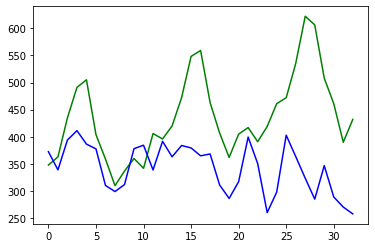

In [15]:
plt.plot(test_true,c='g')
plt.plot(test_pred,c='b')
plt.show()

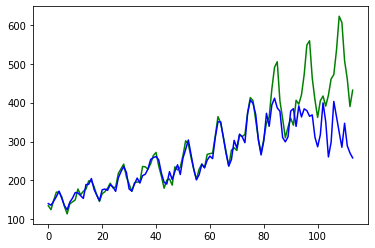

In [16]:
#combining the data
combinedPred=np.concatenate((train_pred,test_pred))
combinedTrue=np.concatenate((train_true,test_true))
plt.plot(combinedTrue,c='g')
plt.plot(combinedPred,c='b')
plt.show()

In [17]:
from keras.layers import LSTM

In [24]:
model2=Sequential()
model2.add(LSTM((1),batch_input_shape=(None,15,1),return_sequences=True))
model2.add(LSTM((1),return_sequences=True))
model2.add(LSTM((1),return_sequences=False))
model2.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 15, 1)             12        
_________________________________________________________________
lstm_6 (LSTM)                (None, 15, 1)             12        
_________________________________________________________________
lstm_7 (LSTM)                (None, 1)                 12        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [25]:
pred_LSTM=model2.fit(trainX,trainY,epochs=e,validation_data=(testX,testY))
pred_LSTM

Train on 81 samples, validate on 33 samples
Epoch 1/2000
81/81 [==============================] - 10s 127ms/step - loss: 0.2292 - acc: 0.0000e+00 - val_loss: 1.2854 - val_acc: 0.0000e+00
Epoch 2/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2261 - acc: 0.0000e+00 - val_loss: 1.2773 - val_acc: 0.0000e+00
Epoch 3/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.2232 - acc: 0.0000e+00 - val_loss: 1.2695 - val_acc: 0.0000e+00
Epoch 4/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2205 - acc: 0.0000e+00 - val_loss: 1.2618 - val_acc: 0.0000e+00
Epoch 5/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2177 - acc: 0.0000e+00 - val_loss: 1.2543 - val_acc: 0.0000e+00
Epoch 6/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.2150 - acc: 0.0000e+00 - val_loss: 1.2471 - val_acc: 0.0000e+00
Epoch 7/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.2124 - acc: 0.0000e+00 - val_loss: 1.

Epoch 59/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0508 - acc: 0.0000e+00 - val_loss: 0.5901 - val_acc: 0.0000e+00
Epoch 60/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0487 - acc: 0.0000e+00 - val_loss: 0.5741 - val_acc: 0.0000e+00
Epoch 61/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0470 - acc: 0.0000e+00 - val_loss: 0.5598 - val_acc: 0.0000e+00
Epoch 62/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0456 - acc: 0.0000e+00 - val_loss: 0.5468 - val_acc: 0.0000e+00
Epoch 63/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0446 - acc: 0.0000e+00 - val_loss: 0.5350 - val_acc: 0.0000e+00
Epoch 64/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0435 - acc: 0.0000e+00 - val_loss: 0.5250 - val_acc: 0.0000e+00
Epoch 65/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0429 - acc: 0.0000e+00 - val_loss: 0.5162 - val_acc: 0.0000e+00
Epoch 66/2000

Epoch 117/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0309 - acc: 0.0000e+00 - val_loss: 0.4205 - val_acc: 0.0000e+00
Epoch 118/2000
81/81 [==============================] - 0s 2ms/step - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.4191 - val_acc: 0.0000e+00
Epoch 119/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0303 - acc: 0.0000e+00 - val_loss: 0.4177 - val_acc: 0.0000e+00
Epoch 120/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.4159 - val_acc: 0.0000e+00
Epoch 121/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0296 - acc: 0.0000e+00 - val_loss: 0.4147 - val_acc: 0.0000e+00
Epoch 122/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0293 - acc: 0.0000e+00 - val_loss: 0.4130 - val_acc: 0.0000e+00
Epoch 123/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0289 - acc: 0.0000e+00 - val_loss: 0.4116 - val_acc: 0.0000e+00
Epoch 

Epoch 175/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0168 - acc: 0.0000e+00 - val_loss: 0.3225 - val_acc: 0.0000e+00
Epoch 176/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0167 - acc: 0.0000e+00 - val_loss: 0.3212 - val_acc: 0.0000e+00
Epoch 177/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0166 - acc: 0.0000e+00 - val_loss: 0.3198 - val_acc: 0.0000e+00
Epoch 178/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0165 - acc: 0.0000e+00 - val_loss: 0.3184 - val_acc: 0.0000e+00
Epoch 179/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0164 - acc: 0.0000e+00 - val_loss: 0.3170 - val_acc: 0.0000e+00
Epoch 180/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0163 - acc: 0.0000e+00 - val_loss: 0.3157 - val_acc: 0.0000e+00
Epoch 181/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0162 - acc: 0.0000e+00 - val_loss: 0.3143 - val_acc: 0.0000e+00
Epoch 

Epoch 233/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0131 - acc: 0.0000e+00 - val_loss: 0.2613 - val_acc: 0.0000e+00
Epoch 234/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0131 - acc: 0.0000e+00 - val_loss: 0.2605 - val_acc: 0.0000e+00
Epoch 235/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0130 - acc: 0.0000e+00 - val_loss: 0.2598 - val_acc: 0.0000e+00
Epoch 236/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0130 - acc: 0.0000e+00 - val_loss: 0.2590 - val_acc: 0.0000e+00
Epoch 237/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.2583 - val_acc: 0.0000e+00
Epoch 238/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.2576 - val_acc: 0.0000e+00
Epoch 239/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0129 - acc: 0.0000e+00 - val_loss: 0.2569 - val_acc: 0.0000e+00
Epoch 

Epoch 291/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.2248 - val_acc: 0.0000e+00
Epoch 292/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.2243 - val_acc: 0.0000e+00
Epoch 293/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.2239 - val_acc: 0.0000e+00
Epoch 294/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.2234 - val_acc: 0.0000e+00
Epoch 295/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.2229 - val_acc: 0.0000e+00
Epoch 296/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.2225 - val_acc: 0.0000e+00
Epoch 297/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.2220 - val_acc: 0.0000e+00
Epoch 

Epoch 349/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.2035 - val_acc: 0.0000e+00
Epoch 350/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.2032 - val_acc: 0.0000e+00
Epoch 351/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.2029 - val_acc: 0.0000e+00
Epoch 352/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.2026 - val_acc: 0.0000e+00
Epoch 353/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.2025 - val_acc: 0.0000e+00
Epoch 354/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.2022 - val_acc: 0.0000e+00
Epoch 355/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.2019 - val_acc: 0.0000e+00
Epoch 

Epoch 407/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.1898 - val_acc: 0.0000e+00
Epoch 408/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.1895 - val_acc: 0.0000e+00
Epoch 409/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.1893 - val_acc: 0.0000e+00
Epoch 410/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.1892 - val_acc: 0.0000e+00
Epoch 411/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.1889 - val_acc: 0.0000e+00
Epoch 412/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.1887 - val_acc: 0.0000e+00
Epoch 413/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.1885 - val_acc: 0.0000e+00
Epoch 

Epoch 465/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1813 - val_acc: 0.0000e+00
Epoch 466/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1811 - val_acc: 0.0000e+00
Epoch 467/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1808 - val_acc: 0.0000e+00
Epoch 468/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1806 - val_acc: 0.0000e+00
Epoch 469/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1805 - val_acc: 0.0000e+00
Epoch 470/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1803 - val_acc: 0.0000e+00
Epoch 471/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.1802 - val_acc: 0.0000e+00
Epoch 

Epoch 523/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.1750 - val_acc: 0.0000e+00
Epoch 524/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.1748 - val_acc: 0.0000e+00
Epoch 525/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.1746 - val_acc: 0.0000e+00
Epoch 526/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.1745 - val_acc: 0.0000e+00
Epoch 527/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.1743 - val_acc: 0.0000e+00
Epoch 528/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.1742 - val_acc: 0.0000e+00
Epoch 529/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.1741 - val_acc: 0.0000e+00
Epoch 

Epoch 581/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1706 - val_acc: 0.0000e+00
Epoch 582/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1705 - val_acc: 0.0000e+00
Epoch 583/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1707 - val_acc: 0.0000e+00
Epoch 584/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1707 - val_acc: 0.0000e+00
Epoch 585/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1706 - val_acc: 0.0000e+00
Epoch 586/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1705 - val_acc: 0.0000e+00
Epoch 587/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.1703 - val_acc: 0.0000e+00
Epoch 

Epoch 639/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1658 - val_acc: 0.0000e+00
Epoch 640/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1660 - val_acc: 0.0000e+00
Epoch 641/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1659 - val_acc: 0.0000e+00
Epoch 642/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1657 - val_acc: 0.0000e+00
Epoch 643/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1656 - val_acc: 0.0000e+00
Epoch 644/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1655 - val_acc: 0.0000e+00
Epoch 645/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.1655 - val_acc: 0.0000e+00
Epoch 

Epoch 697/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.1629 - val_acc: 0.0000e+00
Epoch 698/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.1627 - val_acc: 0.0000e+00
Epoch 699/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.1624 - val_acc: 0.0000e+00
Epoch 700/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.1622 - val_acc: 0.0000e+00
Epoch 701/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.1620 - val_acc: 0.0000e+00
Epoch 702/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.1616 - val_acc: 0.0000e+00
Epoch 703/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.1612 - val_acc: 0.0000e+00
Epoch 

Epoch 755/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.1584 - val_acc: 0.0000e+00
Epoch 756/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.1585 - val_acc: 0.0000e+00
Epoch 757/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.1582 - val_acc: 0.0000e+00
Epoch 758/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1582 - val_acc: 0.0000e+00
Epoch 759/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1582 - val_acc: 0.0000e+00
Epoch 760/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1581 - val_acc: 0.0000e+00
Epoch 761/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.1580 - val_acc: 0.0000e+00
Epoch 

Epoch 813/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1538 - val_acc: 0.0000e+00
Epoch 814/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1540 - val_acc: 0.0000e+00
Epoch 815/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1542 - val_acc: 0.0000e+00
Epoch 816/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1544 - val_acc: 0.0000e+00
Epoch 817/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.1545 - val_acc: 0.0000e+00
Epoch 818/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1542 - val_acc: 0.0000e+00
Epoch 819/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1540 - val_acc: 0.0000e+00
Epoch 

Epoch 871/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1518 - val_acc: 0.0000e+00
Epoch 872/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1522 - val_acc: 0.0000e+00
Epoch 873/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.1523 - val_acc: 0.0000e+00
Epoch 874/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.1524 - val_acc: 0.0000e+00
Epoch 875/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.1524 - val_acc: 0.0000e+00
Epoch 876/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.1521 - val_acc: 0.0000e+00
Epoch 877/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.1517 - val_acc: 0.0000e+00
Epoch 

Epoch 929/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.1504 - val_acc: 0.0000e+00
Epoch 930/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.1506 - val_acc: 0.0000e+00
Epoch 931/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.1506 - val_acc: 0.0000e+00
Epoch 932/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.1504 - val_acc: 0.0000e+00
Epoch 933/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.1503 - val_acc: 0.0000e+00
Epoch 934/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 0.0000e+00 - val_loss: 0.1502 - val_acc: 0.0000e+00
Epoch 935/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.1497 - val_acc: 0.0000e+00
Epoch 

Epoch 987/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.1467 - val_acc: 0.0000e+00
Epoch 988/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.1469 - val_acc: 0.0000e+00
Epoch 989/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.1472 - val_acc: 0.0000e+00
Epoch 990/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.1470 - val_acc: 0.0000e+00
Epoch 991/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.1469 - val_acc: 0.0000e+00
Epoch 992/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.1464 - val_acc: 0.0000e+00
Epoch 993/2000
81/81 [==============================] - 1s 7ms/step - loss: 0.0093 - acc: 0.0000e+00 - val_loss: 0.1463 - val_acc: 0.0000e+00
Epoch 

81/81 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.1445 - val_acc: 0.0000e+00
Epoch 1045/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.1443 - val_acc: 0.0000e+00
Epoch 1046/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.1444 - val_acc: 0.0000e+00
Epoch 1047/2000
81/81 [==============================] - ETA: 0s - loss: 0.0097 - acc: 0.0000e+0 - 0s 4ms/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.1447 - val_acc: 0.0000e+00
Epoch 1048/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1446 - val_acc: 0.0000e+00
Epoch 1049/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1448 - val_acc: 0.0000e+00
Epoch 1050/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.

81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1425 - val_acc: 0.0000e+00
Epoch 1102/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1423 - val_acc: 0.0000e+00
Epoch 1103/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1424 - val_acc: 0.0000e+00
Epoch 1104/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1431 - val_acc: 0.0000e+00
Epoch 1105/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1434 - val_acc: 0.0000e+00
Epoch 1106/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1433 - val_acc: 0.0000e+00
Epoch 1107/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1429 - val_acc: 0.0000e+00
Epoch 1108/2000

81/81 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1413 - val_acc: 0.0000e+00
Epoch 1159/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1416 - val_acc: 0.0000e+00
Epoch 1160/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1417 - val_acc: 0.0000e+00
Epoch 1161/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1416 - val_acc: 0.0000e+00
Epoch 1162/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1416 - val_acc: 0.0000e+00
Epoch 1163/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1418 - val_acc: 0.0000e+00
Epoch 1164/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.0000e+00 - val_loss: 0.1411 - val_acc: 0.0000e+00
Epoch 1165/2000

81/81 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1376 - val_acc: 0.0000e+00
Epoch 1216/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1378 - val_acc: 0.0000e+00
Epoch 1217/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1381 - val_acc: 0.0000e+00
Epoch 1218/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1381 - val_acc: 0.0000e+00
Epoch 1219/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1381 - val_acc: 0.0000e+00
Epoch 1220/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1381 - val_acc: 0.0000e+00
Epoch 1221/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1382 - val_acc: 0.0000e+00
Epoch 1222/2000

81/81 [==============================] - 0s 5ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1363 - val_acc: 0.0000e+00
Epoch 1273/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1361 - val_acc: 0.0000e+00
Epoch 1274/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1362 - val_acc: 0.0000e+00
Epoch 1275/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1363 - val_acc: 0.0000e+00
Epoch 1276/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1364 - val_acc: 0.0000e+00
Epoch 1277/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1366 - val_acc: 0.0000e+00
Epoch 1278/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1364 - val_acc: 0.0000e+00
Epoch 1279/2000

81/81 [==============================] - 0s 5ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1335 - val_acc: 0.0000e+00
Epoch 1330/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1335 - val_acc: 0.0000e+00
Epoch 1331/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.1338 - val_acc: 0.0000e+00
Epoch 1332/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1337 - val_acc: 0.0000e+00
Epoch 1333/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1340 - val_acc: 0.0000e+00
Epoch 1334/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1338 - val_acc: 0.0000e+00
Epoch 1335/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1339 - val_acc: 0.0000e+00
Epoch 1336/2000

81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1333 - val_acc: 0.0000e+00
Epoch 1387/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1330 - val_acc: 0.0000e+00
Epoch 1388/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1324 - val_acc: 0.0000e+00
Epoch 1389/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1327 - val_acc: 0.0000e+00
Epoch 1390/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1329 - val_acc: 0.0000e+00
Epoch 1391/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1331 - val_acc: 0.0000e+00
Epoch 1392/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0088 - acc: 0.0000e+00 - val_loss: 0.1329 - val_acc: 0.0000e+00
Epoch 1393/2000

81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1320 - val_acc: 0.0000e+00
Epoch 1444/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1320 - val_acc: 0.0000e+00
Epoch 1445/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1318 - val_acc: 0.0000e+00
Epoch 1446/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1319 - val_acc: 0.0000e+00
Epoch 1447/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1323 - val_acc: 0.0000e+00
Epoch 1448/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1325 - val_acc: 0.0000e+00
Epoch 1449/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1323 - val_acc: 0.0000e+00
Epoch 1450/2000

81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1318 - val_acc: 0.0000e+00
Epoch 1501/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1316 - val_acc: 0.0000e+00
Epoch 1502/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1321 - val_acc: 0.0000e+00
Epoch 1503/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1323 - val_acc: 0.0000e+00
Epoch 1504/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1321 - val_acc: 0.0000e+00
Epoch 1505/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1322 - val_acc: 0.0000e+00
Epoch 1506/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1323 - val_acc: 0.0000e+00
Epoch 1507/2000

81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1305 - val_acc: 0.0000e+00
Epoch 1558/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1306 - val_acc: 0.0000e+00
Epoch 1559/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1304 - val_acc: 0.0000e+00
Epoch 1560/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1304 - val_acc: 0.0000e+00
Epoch 1561/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1299 - val_acc: 0.0000e+00
Epoch 1562/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1297 - val_acc: 0.0000e+00
Epoch 1563/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1297 - val_acc: 0.0000e+00
Epoch 1564/2000

81/81 [==============================] - 1s 9ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1292 - val_acc: 0.0000e+00
Epoch 1615/2000
81/81 [==============================] - 0s 6ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1286 - val_acc: 0.0000e+00
Epoch 1616/2000
81/81 [==============================] - 1s 7ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1278 - val_acc: 0.0000e+00
Epoch 1617/2000
81/81 [==============================] - 1s 6ms/step - loss: 0.0087 - acc: 0.0000e+00 - val_loss: 0.1279 - val_acc: 0.0000e+00
Epoch 1618/2000
81/81 [==============================] - 1s 6ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1284 - val_acc: 0.0000e+00
Epoch 1619/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1293 - val_acc: 0.0000e+00
Epoch 1620/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1295 - val_acc: 0.0000e+00
Epoch 1621/2000

81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1281 - val_acc: 0.0000e+00
Epoch 1672/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1278 - val_acc: 0.0000e+00
Epoch 1673/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1276 - val_acc: 0.0000e+00
Epoch 1674/2000
81/81 [==============================] - 0s 6ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1274 - val_acc: 0.0000e+00
Epoch 1675/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1277 - val_acc: 0.0000e+00
Epoch 1676/2000
81/81 [==============================] - 0s 6ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1279 - val_acc: 0.0000e+00
Epoch 1677/2000
81/81 [==============================] - 0s 6ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1281 - val_acc: 0.0000e+00
Epoch 1678/2000

81/81 [==============================] - 0s 6ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1263 - val_acc: 0.0000e+00
Epoch 1729/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1269 - val_acc: 0.0000e+00
Epoch 1730/2000
81/81 [==============================] - 0s 6ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1269 - val_acc: 0.0000e+00
Epoch 1731/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1261 - val_acc: 0.0000e+00
Epoch 1732/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1256 - val_acc: 0.0000e+00
Epoch 1733/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1257 - val_acc: 0.0000e+00
Epoch 1734/2000
81/81 [==============================] - 0s 6ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1264 - val_acc: 0.0000e+00
Epoch 1735/2000

81/81 [==============================] - 0s 6ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1284 - val_acc: 0.0000e+00
Epoch 1786/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1279 - val_acc: 0.0000e+00
Epoch 1787/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1276 - val_acc: 0.0000e+00
Epoch 1788/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1280 - val_acc: 0.0000e+00
Epoch 1789/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1274 - val_acc: 0.0000e+00
Epoch 1790/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1276 - val_acc: 0.0000e+00
Epoch 1791/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1274 - val_acc: 0.0000e+00
Epoch 1792/2000

81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1260 - val_acc: 0.0000e+00
Epoch 1843/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1265 - val_acc: 0.0000e+00
Epoch 1844/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1262 - val_acc: 0.0000e+00
Epoch 1845/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1264 - val_acc: 0.0000e+00
Epoch 1846/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1258 - val_acc: 0.0000e+00
Epoch 1847/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1251 - val_acc: 0.0000e+00
Epoch 1848/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1249 - val_acc: 0.0000e+00
Epoch 1849/2000

81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1253 - val_acc: 0.0000e+00
Epoch 1900/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1254 - val_acc: 0.0000e+00
Epoch 1901/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1258 - val_acc: 0.0000e+00
Epoch 1902/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1254 - val_acc: 0.0000e+00
Epoch 1903/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1247 - val_acc: 0.0000e+00
Epoch 1904/2000
81/81 [==============================] - 0s 6ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1245 - val_acc: 0.0000e+00
Epoch 1905/2000
81/81 [==============================] - 1s 8ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1252 - val_acc: 0.0000e+00
Epoch 1906/2000

81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1235 - val_acc: 0.0000e+00
Epoch 1957/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1232 - val_acc: 0.0000e+00
Epoch 1958/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0084 - acc: 0.0000e+00 - val_loss: 0.1224 - val_acc: 0.0000e+00
Epoch 1959/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1220 - val_acc: 0.0000e+00
Epoch 1960/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1230 - val_acc: 0.0000e+00
Epoch 1961/2000
81/81 [==============================] - 0s 5ms/step - loss: 0.0084 - acc: 0.0000e+00 - val_loss: 0.1235 - val_acc: 0.0000e+00
Epoch 1962/2000
81/81 [==============================] - 0s 4ms/step - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.1238 - val_acc: 0.0000e+00
Epoch 1963/2000

In [26]:
test_pred2=model2.predict(testX)
test_pred2=scaler.inverse_transform(test_pred2).ravel()

train_pred2=model2.predict(trainX)
train_pred2=scaler.inverse_transform(train_pred2).ravel()

train_true=scaler.inverse_transform([trainY]).ravel()
test_true=scaler.inverse_transform([testY]).ravel()

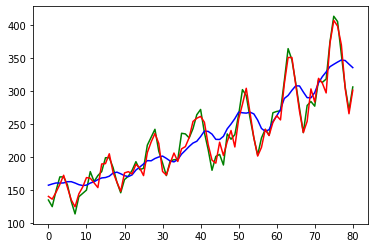

In [27]:
plt.plot(train_true,c='g')
plt.plot(train_pred2,c='b')
plt.plot(train_pred,c='r')
plt.show()

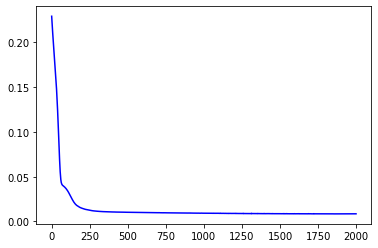

In [28]:
plt.plot(pred_LSTM.history['loss'],c='b')
plt.show()

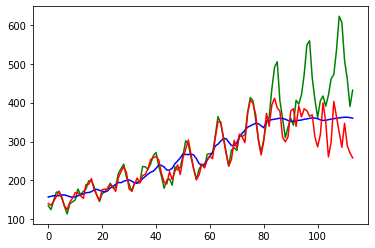

In [29]:
combinedPred2=np.concatenate((train_pred2,test_pred2))
combinedTrue=np.concatenate((train_true,test_true))
plt.plot(combinedTrue,c='g')
plt.plot(combinedPred2,c='b')
plt.plot(combinedPred,c='r')
plt.show()

In [38]:

for i in range(81):
    lol1=np.reshape(trainX[i],(1,trainX.shape[1],1))
    lol1=model.predict(lol1)
    lol2=np.reshape(trainX[i],(1,trainX.shape[1],1))
    lol2=model.predict(lol2)
    act=np.reshape(trainY[i],(1,-1))
    act=scaler.inverse_transform(act)
    lol1=scaler.inverse_transform(lol1)
    lol2=scaler.inverse_transform(lol2)
    print("Actual Output=",act,"Vanilla RNN Output=",lol1,"LSTM Output=",lol2)

Actual Output= [[135.]] Vanilla RNN Output= [[140.45007]] LSTM Output= [[140.45007]]
Actual Output= [[125.]] Vanilla RNN Output= [[136.32185]] LSTM Output= [[136.32185]]
Actual Output= [[149.]] Vanilla RNN Output= [[146.74622]] LSTM Output= [[146.74622]]
Actual Output= [[170.]] Vanilla RNN Output= [[158.57198]] LSTM Output= [[158.57198]]
Actual Output= [[170.]] Vanilla RNN Output= [[172.47241]] LSTM Output= [[172.47241]]
Actual Output= [[157.99998]] Vanilla RNN Output= [[154.04915]] LSTM Output= [[154.04915]]
Actual Output= [[133.]] Vanilla RNN Output= [[135.21153]] LSTM Output= [[135.21153]]
Actual Output= [[113.99999]] Vanilla RNN Output= [[124.797775]] LSTM Output= [[124.797775]]
Actual Output= [[140.]] Vanilla RNN Output= [[144.3085]] LSTM Output= [[144.3085]]
Actual Output= [[145.]] Vanilla RNN Output= [[154.59256]] LSTM Output= [[154.59256]]
Actual Output= [[150.]] Vanilla RNN Output= [[168.96747]] LSTM Output= [[168.96747]]
Actual Output= [[177.99998]] Vanilla RNN Output= [[167.